A limitation of the Fourier transform is that it does not tell us when in time a particular signal exists. F.T lacks capabilities to provide frequency information for localized signals in time. Thus, it is ideal for stationary signals.

We need a method that catches characteristic frequencies at different times. A method that shifts the Fourier transform in time, to specific windows in time. 

## Short-time Fourier transform:

The method is called a Short-time Fourier transform. It assumes some portion of the non-stationary signal is stationary and takes a FFT of each portion. At the end, we make a representation in the time-frequency domain.

$$
\begin{equation}
X(\tau, \omega) = \int_{-\infty}^{\infty} x(t) w(t - \tau) e^{-i \omega t} \, dt
\end{equation}
$$

We take a window function of fixed length and move it along the signal, by the translation parameter $\tau$. But this is a limitation, it should adapt to the the different sections of the signal. We would not capture all frequencies with the same resolution. Also, this fixed length of the window implies that time and frequency resolutions are fixed for the entire domain.
$$
\Rightarrow \Delta t \Delta \nu \geq \frac{1}{4 \pi}
$$
$\textbf{We don't know what frequency exists at what instance, what we get is frequency bands that exist at particular time intervals.}$

# Wavelet transforms
It allows us to analyze a signal into different frequencies at different time resolutions by using a window function of a wavepacket (called a wavelet here). It can be shifted, shrunken (capture details of the signal) and stretched (capture overall trend of the signal).
Set of methods to carry out spectral analysis in the time domain, it's a multi-resolution analysis.

$$
\begin{equation}
X(\tau, s) = \frac{1}{\sqrt{|s|}} \int_{-\infty}^{\infty} x(t) \, \overline{\psi\left( \frac{t - \tau}{s} \right)} \, dt
\end{equation}
$$

$s$ is the scaling parameter, it has units of [$time$]. $\tau$ is the translation parameter, it has units of [$time$]. The window function is obtained from the wavelet $\psi$, which can have different forms. The window functions are stretched or compressed and shifted versions of the chosen wavelet.

The basis functions for the wavelet transform are wavelets, while for the Fourier transform the basis functions are sine and cosine functions. Wavelets transforms should be used for non-stationary signals.

## Discrete wavelet transform:
### Approximation coefficients (A): 
* Wavelets with large values of $s$, they're stretched.
* They represent the low-frequency parts of the signal, the overall trend.
### Detail coefficients (D):
* Wavelets with small values of $s$, they're compressed.
* They represent the high-frequency parts of the signal, the details or sharp features.

The WT calculates these coefficients at all scales, while the DWT takes $s$ and $\tau$ as discrete values, which reduces the amount of data. $s$ and $\tau$ are usually powers of dyadics.

$$
\begin{equation}
X(\tau, s) = \frac{1}{\sqrt{s}} \sum_{i = 0}^{p - 1} x[t_i] \ \psi [\frac{t_i - \tau}{s}]
\end{equation}
$$
where,

$\tau = k \ 2^{-j}$

$s = 2^{-j}$

p: number of WT coefficients.

j: index of scaling.

k: index of WT coefficients.


### Multilevel decomposition of the DWT:
It's based on repeatedly decomposing a signal into a low-frequency part (A) and a high-frequency part (D). We do this for each level (tree-like structure) until there is no clear difference between the elements of $A$ and $D$.

### Example 1:

Let's carry out a Discrete Wavelet Transform of this signal:

$f(n) = (2, 4, 6, 8, 9, -2, 3, -4)$ 

Then, carry out an inverse DWT to recover the signal.

In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd

# https://pywavelets.readthedocs.io/en/latest/

In [2]:
print(pywt.wavelist(kind = "discrete"))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [3]:
print(pywt.wavelist(kind = "continuous"))

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


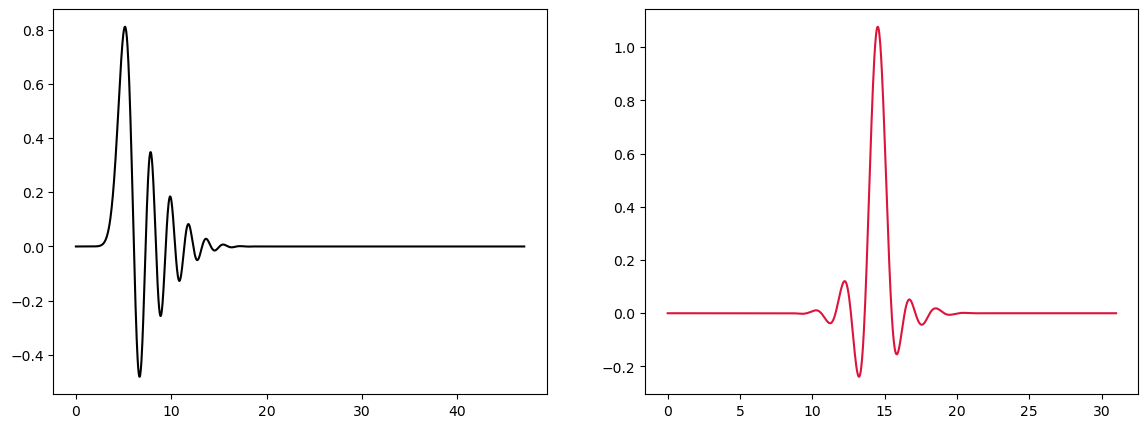

In [4]:
# 2 wavelets
w2 = pywt.Wavelet("db24") #get the properties
w3 = pywt.Wavelet("sym16")

# Plotting
# Gather information on wavelet
phi_2, psi_2, x_2 = w2.wavefun(level = 5)
phi_3, psi_3, x_3 = w3.wavefun(level = 5)

# Figure env
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
ax1.plot(x_2, phi_2, color = "black")
ax2.plot(x_3, phi_3, color = "crimson")
plt.show()

In [5]:
# signal:

f = [2, 4, 6, 8, 9, -2, 3, -4, -7]

print(f, len(f))

[2, 4, 6, 8, 9, -2, 3, -4, -7] 9


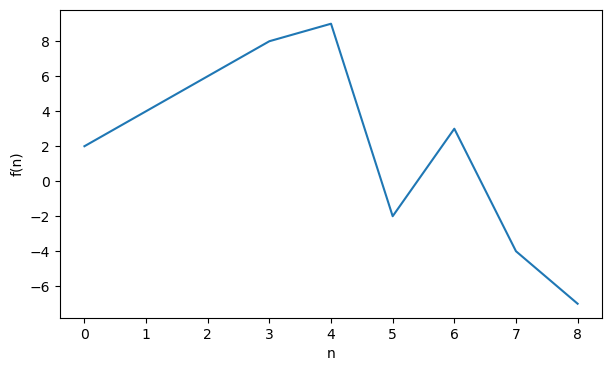

In [6]:
plt.figure(figsize=(7,4))

plt.plot(f)

plt.xlabel("n")
plt.ylabel("f(n)")

plt.show()

In [7]:
# DWT:

cA, cD = pywt.dwt(f, 'haar')

In [8]:
print(cA) # approximation coef.
print(cD) # detail coef.

[ 4.24264069  9.89949494  4.94974747 -0.70710678 -9.89949494]
[-1.41421356 -1.41421356  7.77817459  4.94974747  0.        ]


The coefficients arrays have the same size, which is approximately half the length of the signal on the 1st level.

In [9]:
# iDWT

f_recovered = pywt.idwt(cA, cD, 'haar')

In [10]:
print(f)
print(f_recovered)

[2, 4, 6, 8, 9, -2, 3, -4, -7]
[ 2.  4.  6.  8.  9. -2.  3. -4. -7. -7.]


### Example 2:

$$f(x) = A \sin(kx) + n(x)$$$$

In [11]:
# Pure sine function
def func (x, a, k, b):
    """
    Inputs: 
        a -> amplitude of the sine function
        k -> wavenumber
        b -> noise amplitude      
    """
    f_sin = a*np.sin(k*x) + b*np.random.randn(len(x))

    return f_sin

In [12]:
# Generate x axis
x = np.linspace(0., 4*np.pi, 1000)

# Fix parameters
a = 1.
k = 2./(np.pi)
b = 0.1

# Evaluate our function
noisy_sine = func(x, a, k, b)

# Safe check
print(x.shape, noisy_sine.shape)

(1000,) (1000,)


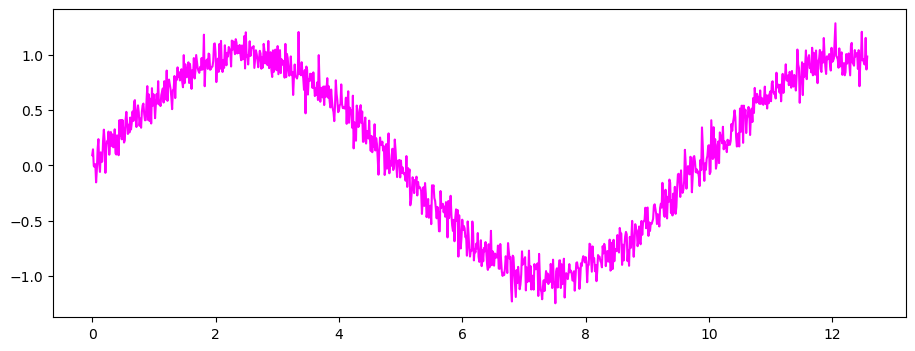

In [13]:
# Plotting
plt.figure(figsize = (11, 4))
plt.plot(x, noisy_sine, color = "magenta")
plt.show()

In [14]:
# DWT:

cA, cD = pywt.dwt(noisy_sine, 'haar') #one level

print(noisy_sine.shape, cA.shape, cD.shape)

(1000,) (500,) (500,)


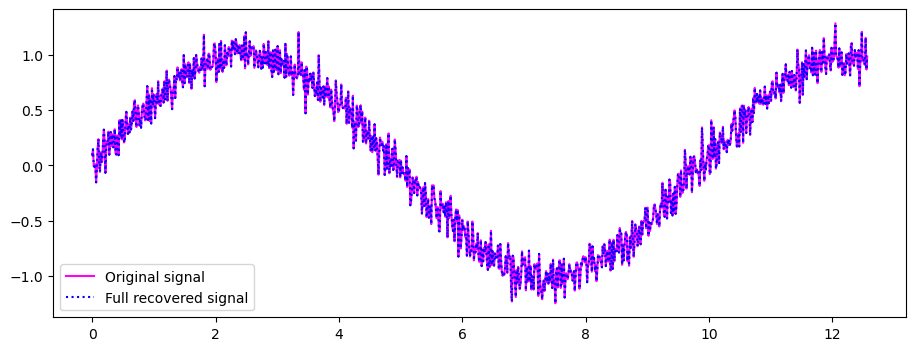

In [15]:
# iDWT
sine_recovered = pywt.idwt(cA, cD, 'haar')

# Plotting
plt.figure(figsize = (11, 4))
plt.plot(x, noisy_sine, color = "magenta", label = "Original signal")
plt.plot(x, sine_recovered, linestyle  = ":", color = "blue", label = "Full recovered signal")

plt.legend()
plt.show()

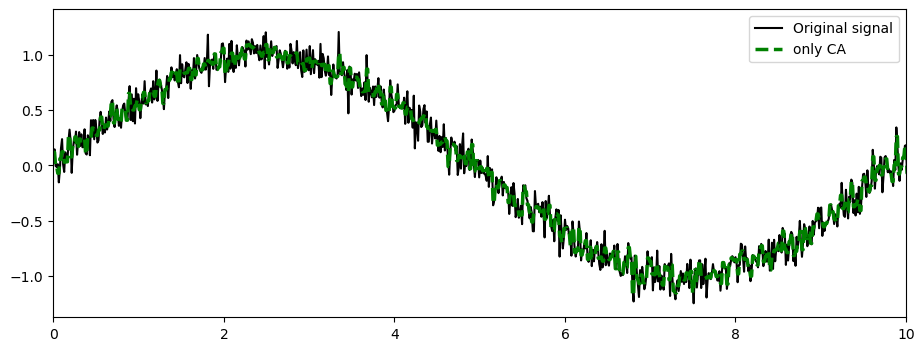

In [16]:
# Only low-frequencies
# iDWT
ca_recovered = pywt.idwt(cA, None, 'haar')

# Plotting
plt.figure(figsize = (11, 4))
plt.plot(x, noisy_sine, color = "black", label = "Original signal")
plt.plot(x, ca_recovered, linestyle  = "--", linewidth = 2.5, color = "green", label = "only CA")

plt.xlim(0, 10)
plt.legend()
plt.show()

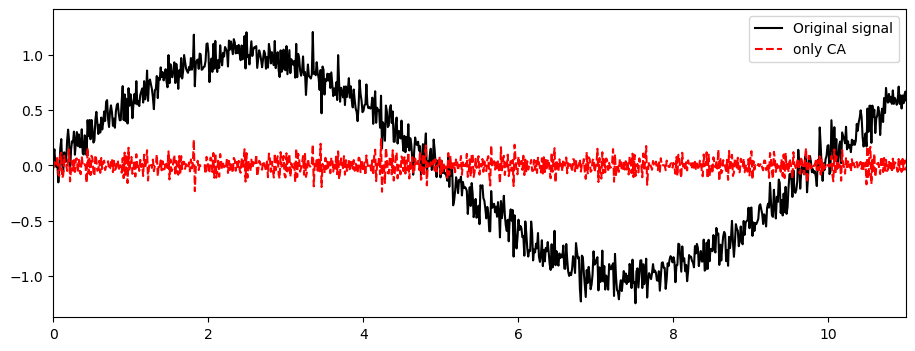

In [17]:
# Only high-frequencies
# iDWT
cd_recovered = pywt.idwt(None, cD, 'haar')

# Plotting
plt.figure(figsize = (11, 4))
plt.plot(x, noisy_sine, color = "black", label = "Original signal")
plt.plot(x, cd_recovered, linestyle  = "--", linewidth = 1.5, color = "red", label = "only CA")

plt.xlim(0, 11)
plt.legend()
plt.show()

## Wavelet transform analysis:

coeffs = pywt.wavedec(x, 'wavelet', mode ='sym', level = n)

y = pywt.waverec(coeffs, 'wavelet', mode ='sym')

https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html

### Revisit Example 1:

In [18]:
#DWT
coeffs = pywt.wavedec(f, 'db1', level = 2, mode = 'periodic')

cA2, cD2, cD1 = coeffs

print(cA2.shape) #second level
print(cD2.shape) #second level
print(cD1.shape) #first level

(3,)
(3,)
(5,)


In [19]:
#DWT reconstruction
f_recovered2 = pywt.waverec(coeffs, 'db1', mode = 'periodic')

In [20]:
print(f)
print(f_recovered2) #we get an extra element if the len of the signal is not even

[2, 4, 6, 8, 9, -2, 3, -4, -7]
[ 2.  4.  6.  8.  9. -2.  3. -4. -7.  2.]


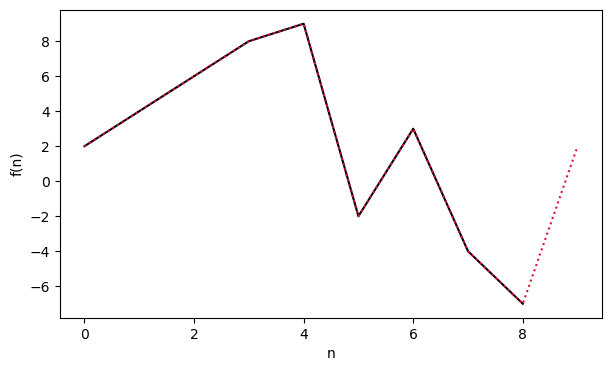

In [21]:
plt.figure(figsize=(7,4))

plt.plot(f, color = "black")
plt.plot(f_recovered2, linestyle = ":", color = "crimson")

plt.xlabel("n")
plt.ylabel("f(n)")

plt.show()

In [22]:
#Ignoring the last level


### Revisit Example 2:

In [23]:
#DWT
coeffs = pywt.wavedec(noisy_sine, 'db1', level = 2, mode = 'periodic')

cA2, cD2, cD1 = coeffs

print(cA2.shape) #second level
print(cD2.shape) #second level
print(cD1.shape) #first level

(250,)
(250,)
(500,)


In [24]:
#DWT reconstruction
sine_recovered2 = pywt.waverec(coeffs, 'db1', mode = 'periodic')